In [22]:
import numpy as np
import scipy as sp
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
import os
import fit_library_n

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:

# FITTING PROCEDURE
def fit_FBK_gain(data,voltage,n,gain_array,gainerr_array,bounds,param,volts,GAIN=961):
    x = (data[voltage][:,0]-np.min(data[voltage][:,0]))*1E9
    y = (data[voltage][:,1])/np.max(data[voltage][:,1])
    fit = fit_library_n.gaussn_least(x,y,n)
    out_param,perr = fit(bounds,*param)
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,fit.evaluate())
    print out_param
    print perr

    T_int = 400E-9
    #GAIN  = 961
    pV = (out_param[1]/1E9) / T_int; pV_err = (perr[1]/1E9) / T_int
    I_i = pV / GAIN;                 I_i_err = pV_err / GAIN
    Q_i = I_i * T_int;               Q_i_err = I_i_err * T_int
    GAIN_SiPM = Q_i / 1.602E-19;     GAIN_SiPM_err = Q_i_err / 1.602E-19
    print("SiPM GAIN = %e +- %e for VDC = %f" % (np.abs(GAIN_SiPM),np.abs(GAIN_SiPM_err),volts[voltage]))
    gain_array[voltage]=GAIN_SiPM
    gainerr_array[voltage] = GAIN_SiPM_err
    
    #return GAIN


In [24]:
data=[]
filenames=['F2FBK00073.dat']
voltages_array = np.array([35.00])
gain_array = np.zeros(np.shape(voltages_array)[0])
gainerr_array = np.zeros(np.shape(voltages_array)[0])
for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   

F2FBK00073.dat


`ftol` termination condition is satisfied.
Function evaluations 16, initial cost 3.6126e+01, final cost 2.4799e+00, first-order optimality 5.20e-04.


<IPython.core.display.Javascript object>


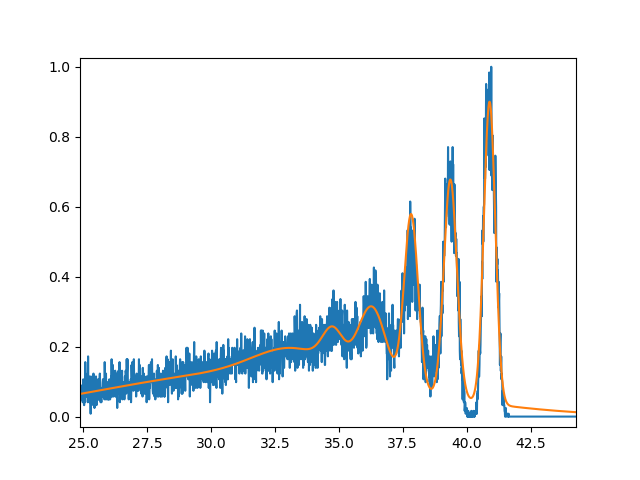

[ 40.89374268  -1.53269196   0.86304762   0.62362747   0.5          0.21139604
   0.09836795   0.07213731   0.12817428   0.22328371   0.25378631
   0.27094414   0.55067418   0.40167206   1.51530154   5.83829588]
[ 0.00174693  0.00181274  0.00617369  0.00579654  0.00562412  0.00449155
  0.00508685  0.00336762  0.00261374  0.00186742  0.00275954  0.00381032
  0.01538131  0.02548136  0.09966033  0.08902136]
SiPM GAIN = 3.543469e+06 +- 4.190926e+03 for VDC = 35.000000


In [26]:
param_3500  = [41.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3500 =([39.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
              [42.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data,0,7,gain_array, gainerr_array, bounds_3500, param_3500, voltages_array,2700)